## Зачетная работа

Дла анализа вам предлагается набор данных об академической успеваемости учеников. Требуется построить модель, классифицирующую учеников по успеваемости.

Описание данных:
* __Gender__: M -- male, F -- female
* __Nationality__: национальность ученика
* __PlaceofBirth__: место рождения ученика
* __StageID__: уровень образования ученика
* __GradeID__: номер класса
* __SectionID__: номер секции
* __Topic__: тема курса
* __Semester__: номер семестра (F -- first, S -- second)
* __Relation__: родитель, несущий ответственность за ученика
* __raisedhands__: количество поднятий руки на занятиях
* __VisITedResources__: количество посещений учеником информационных ресурсов по курсу
* __AnnouncementsView__: количество просмотров новых объявлений по курсу
* __Discussion__: количетсво участий в обсуждениях в группе
* __ParentAnsweringSurvey__: проходили ли родители ученика опрос от школы ('Yes'/'No')
* __ParentschoolSatisfaction__: степень удовлетворенности родителей школой ('Good'/'Bad')
* __StudentAbsenceDays__: количество пропущенных учеником дней ('Under-7' -- менее 7, 'Above-7' -- более 7)
* __Class__: успеваемость (L -- low (от 0 до 69 баллов), M -- middle (от 70 до 89 баллов), H -- high (от 90 до 100 баллов))

### Требуется

1. Провести предварительную обработку данных.
2. Построить две модели классификации (см. список ниже), для каждой из которых:

    2.1. Выбрать параметр (параметры), который будете подбирать.

    2.2. Оценить качество по кросс-валидации в зависимости от значений параметра (параметров). В качестве метрики качества использовать Accuracy.
    
    2.3. Выбрать наилучший параметр (параметры).
    
3. Сравнить модели между собой, сделать выводы.

## Список моделей

1. Метод опорных векторов (sklearn.svm.SVC)
2. Метод k ближайших соседей (sklearn.neighbors.KNeighborsClassifier)
3. Решающее дерево (sklearn.tree.DecisionTreeClassifier)
4. Случайный лес (sklearn.ensemble.RandomForestClassifier)
5. Линейная модель классификации с L2 регуляризацией (sklearn.linear_model.RidgeClassifier)

* Кабанцов Юрий   3, 4
* В данной работе будут построены модели классификации на основе решающего дерева и случайного леса

In [40]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [41]:
data = pd.read_csv('education_data.csv')
data.shape

(480, 17)

In [42]:
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


Выделим из датасета целевую переменную Grant.Status и обозначим её за y. 
Теперь X обозначает обучающую выборку, y - ответы на ней.

In [43]:
X = data.drop('Class', 1)
y = data['Class']

In [44]:
numeric_cols = ['raisedhands', 'AnnouncementsView', 'VisITedResources', 'Discussion']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [45]:
lab_enc = LabelEncoder()
X_categorical = X[categorical_cols]

for colum in categorical_cols:
    lab_enc.fit(X[colum])
    X[colum] = lab_enc.transform(X_categorical[colum])

Случайный лес

C:\Users\Suntes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Наилучшее значение n_estimators:  {'n_estimators': 11}
Точность: 0.670833333333


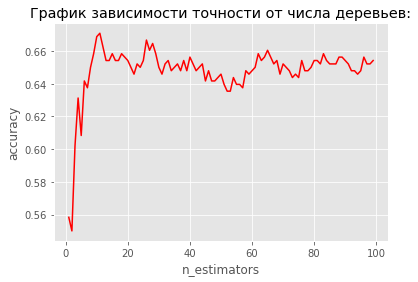

In [46]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=16150)
param_grid = {'n_estimators': np.arange(1,100,1)}

cv = 5
clf_rf = GridSearchCV(estimator, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
clf_rf.fit(X, y)

scores = clf_rf.grid_scores_
accuracy = [scores[i][1] for i in range(len(param_grid['n_estimators']))]

plt.plot(param_grid['n_estimators'], accuracy, color='red')
plt.title("График зависимости точности от числа деревьев:")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")

print("Наилучшее значение n_estimators: ", clf_rf.best_params_)
print("Точность:", clf_rf.best_score_)
n_estimators = clf_rf.best_params_['n_estimators']

In [47]:
estimator = RandomForestClassifier(random_state=16150, n_estimators=100) 
param_grid = {'max_depth': np.arange(1,100,2), 'max_features': np.arange(1,17,1) }

cv = 5
clf_rf = GridSearchCV(estimator, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=4)
clf_rf.fit(X, y)

print("Пара параметров, при которых точность алгоритма наибольшая:", clf_rf.best_params_)
print("Точность:", clf_rf.best_score_)

Пара параметров, при которых точность алгоритма наибольшая: {'max_depth': 3, 'max_features': 9}
Точность: 0.710416666667


C:\Users\Suntes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


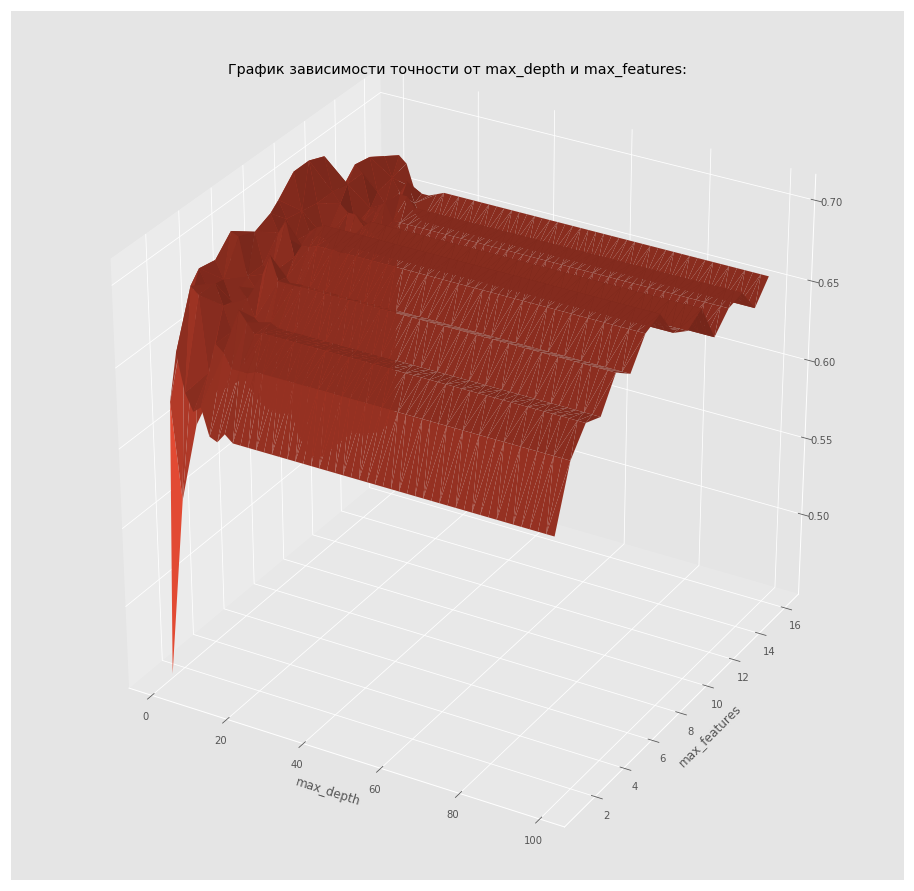

In [48]:
scores = clf_rf.grid_scores_
accuracy = [scores[i][1] for i in range(len(param_grid['max_depth'])*len(param_grid['max_features']))]

fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

x_v = [x for x in param_grid['max_depth'] for j in range(len(param_grid['max_features']))]
y_v = [y for i in range(len(param_grid['max_depth'])) for y in param_grid['max_features']]

surf = ax.plot_trisurf(x_v, y_v, accuracy)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('График зависимости точности от max_depth и max_features:')
plt.show()

Дерево решений

In [49]:
estimator = DecisionTreeClassifier(random_state=16150, presort=True) #2346334
param_grid = {'max_depth': np.arange(1,100,2), 'max_features': np.arange(1,17,1) }
cv = 5

clf = GridSearchCV(estimator, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=4)
clf.fit(X, y)

print("Пара параметров, при которых точность алгоритма наибольшая:", clf.best_params_)
print("Точность:", clf.best_score_)

Пара параметров, при которых точность алгоритма наибольшая: {'max_depth': 3, 'max_features': 10}
Точность: 0.702083333333


C:\Users\Suntes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


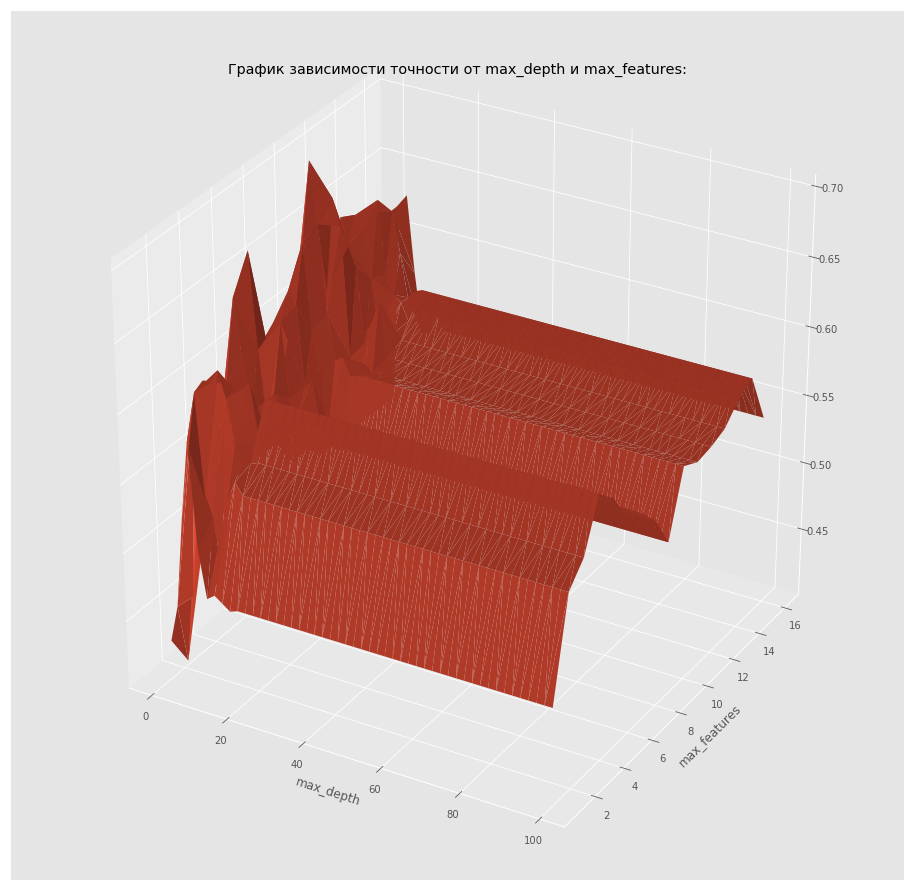

In [50]:
scores = clf.grid_scores_
accuracy = [scores[i][1] for i in range(len(param_grid['max_depth'])*len(param_grid['max_features']))]

fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

x_v = [x for x in param_grid['max_depth'] for j in range(len(param_grid['max_features']))]
y_v = [y for i in range(len(param_grid['max_depth'])) for y in param_grid['max_features']]

surf = ax.plot_trisurf(x_v, y_v, accuracy)
plt.xlabel('max_depth')
plt.ylabel('max_features')
plt.title('График зависимости точности от max_depth и max_features:')
plt.show()

Сравнение моделей и выводы:

Сравним точность построенных моделей используя cross_val_score.

In [52]:
from sklearn.model_selection import cross_val_score
print("Случайный лес: cross_val_score =", cross_val_score(clf_rf.best_estimator_, X, y, cv = 50).mean())
print("Дерево решений: cross_val_score =", cross_val_score(clf.best_estimator_, X, y, cv = 50).mean())

Случайный лес: cross_val_score = 0.702444444444
Дерево решений: cross_val_score = 0.635242424242


Выводы: 
* Исходя из полученных результатов, можно заметить, что модель дерева решений даёт менее точные результаты по сравнению с моделью случайного леса. Так же видно, что точность обоих алгоритмов зависит от выбираемых параметров max_depth и max_features и их нужно тщательно подбирать для полукчения точных результатов. Т.ж. в модели случайного леса нужно подбирать кол-во деревьев таким образом, чтобы найти их минимальное кол-во при котором точность останется на достаточно высоком уровне, а затратыт производительности будут минимальными.